<a href="https://colab.research.google.com/github/ElsCorporation/ChallengeAlluraStore/blob/main/AluraStoreBrEdinhoLima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
somaTotalLoja01 = loja['Preço'].sum()
somaTotalLoja02 = loja2['Preço'].sum()
somaTotalLoja03 = loja3['Preço'].sum()
somaTotalLoja04 = loja4['Preço'].sum()

print(f'Faturamento de cada loja:\n\nLoja 01: R$ {somaTotalLoja01}\nLoja 02: R$ {somaTotalLoja02}\nLoja 03: R$ {somaTotalLoja03}\nLoja 04: R$ {somaTotalLoja04}')

Faturamento de cada loja:

Loja 01: R$ 1534509.12
Loja 02: R$ 1488459.06
Loja 03: R$ 1464025.03
Loja 04: R$ 1384497.58


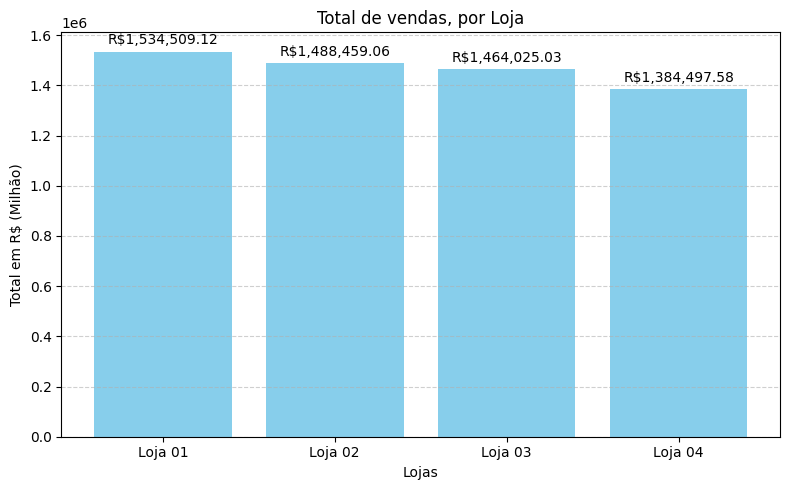

In [48]:
import matplotlib.pyplot as plt

lojas = ['Loja 01', 'Loja 02', 'Loja 03', 'Loja 04']
valores = [somaTotalLoja01, somaTotalLoja02, somaTotalLoja03, somaTotalLoja04]

fig, ax = plt.subplots(figsize=(8,5))

barras = ax.bar(lojas, valores, color='skyblue')
ax.set_title('Total de vendas, por Loja')
ax.set_xlabel('Lojas')
ax.set_ylabel('Total em R$ (Milhão)')
ax.grid(axis='y', linestyle='--', alpha=0.6)

ax.bar_label(barras, labels=[f'R${v:,.2f}' for v in valores], padding=3)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [3]:
contagemCategoriasLoja01 = loja['Categoria do Produto'].value_counts()
contagemCategoriasLoja02 = loja2['Categoria do Produto'].value_counts()
contagemCategoriasLoja03 = loja3['Categoria do Produto'].value_counts()
contagemCategoriasLoja04 = loja4['Categoria do Produto'].value_counts()

print('\nLoja 01:\n',contagemCategoriasLoja01)
print('\nLoja 02:\n',contagemCategoriasLoja02)
print('\nLoja 03:\n',contagemCategoriasLoja03)
print('\nLoja 04:\n',contagemCategoriasLoja04)


Loja 01:
 Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

Loja 02:
 Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64

Loja 03:
 Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64

Loja 04:
 Categoria do Produto
moveis                   480
eletronicos              451
brinquedos               338
esporte e l

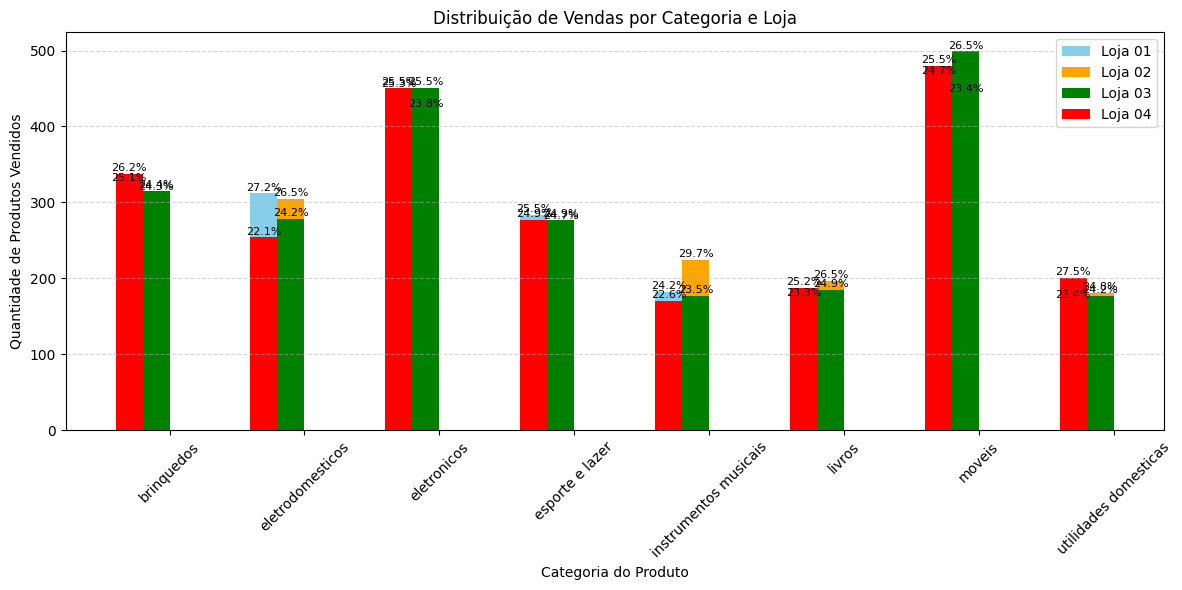

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pf

df = pf.DataFrame(
    {
       'Loja 01': contagemCategoriasLoja01,
       'Loja 02': contagemCategoriasLoja02,
       'Loja 03': contagemCategoriasLoja03,
       'Loja 04': contagemCategoriasLoja04
    }
).fillna(0).astype(int)

categorias = df.index
x = np.arange(len(categorias))

largura = 0.2

fig, ax = plt.subplots(figsize=(12,6))

barras1 = ax.bar(x - 1.5 * largura, df['Loja 01'], width=largura, label='Loja 01', color='skyblue')
barras2 = ax.bar(x - 0.5 * largura, df['Loja 02'], width=largura, label='Loja 02', color='orange')
barras3 = ax.bar(x - 0.5 * largura, df['Loja 03'], width=largura, label='Loja 03', color='green')
barras4 = ax.bar(x - 1.5 * largura, df['Loja 04'], width=largura, label='Loja 04', color='red')

def porcentagem(barras, totalPorCategoria):
  for i, bar in enumerate(barras):
    altura = bar.get_height()
    if totalPorCategoria[i] > 0:
      porcentagem = (altura / totalPorCategoria[i]) * 100
      ax.text(bar.get_x() + bar.get_width()/2, altura + 1,
                    f'{porcentagem:.1f}%', ha='center', va='bottom', fontsize=8)

total_por_categoria = df.sum(axis=1).values
porcentagem(barras1, total_por_categoria)
porcentagem(barras2, total_por_categoria)
porcentagem(barras3, total_por_categoria)
porcentagem(barras4, total_por_categoria)

ax.set_xlabel('Categoria do Produto')
ax.set_ylabel('Quantidade de Produtos Vendidos')
ax.set_title('Distribuição de Vendas por Categoria e Loja')
ax.set_xticks(x)
ax.set_xticklabels(categorias, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

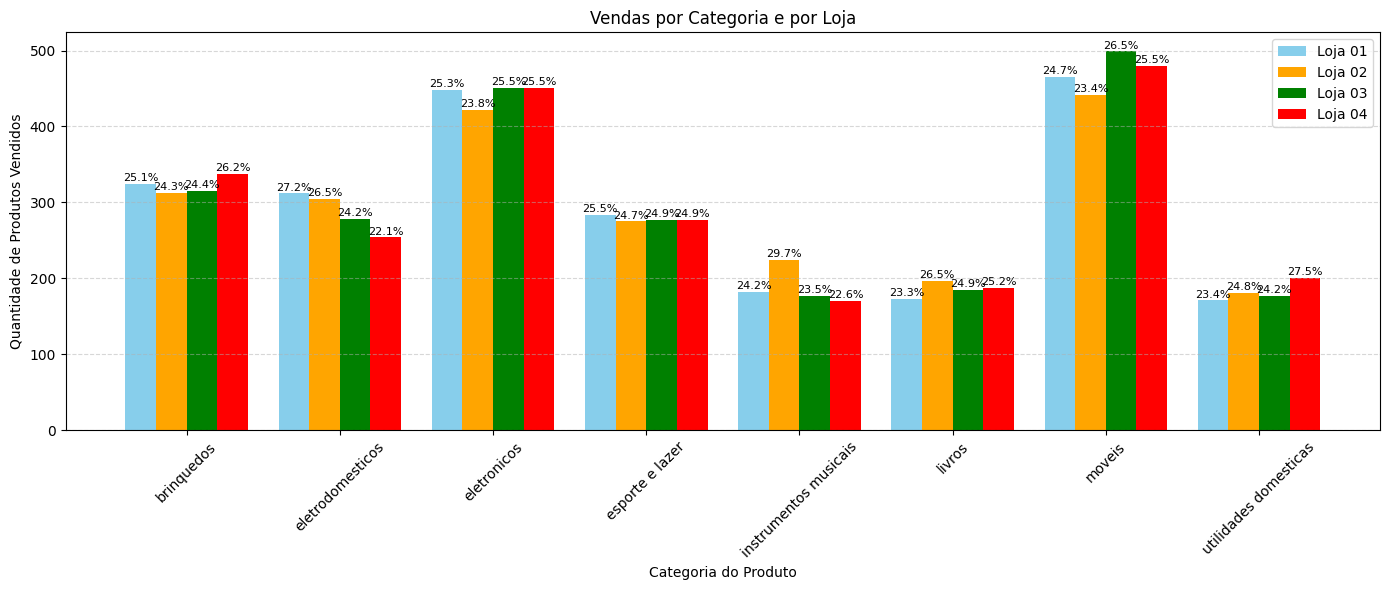

In [53]:
categorias = df.index
n_categorias = len(categorias)
x = np.arange(n_categorias)  # base para o eixo x
largura = 0.2  # largura de cada barra

# Ajustar o tamanho da figura para mais clareza
fig, ax = plt.subplots(figsize=(14, 6))

# Criar as barras separadas
b1 = ax.bar(x - 1.5*largura, df['Loja 01'], width=largura, label='Loja 01', color='skyblue')
b2 = ax.bar(x - 0.5*largura, df['Loja 02'], width=largura, label='Loja 02', color='orange')
b3 = ax.bar(x + 0.5*largura, df['Loja 03'], width=largura, label='Loja 03', color='green')
b4 = ax.bar(x + 1.5*largura, df['Loja 04'], width=largura, label='Loja 04', color='red')

# Cálculo do total de vendas por categoria
total_por_categoria = df.sum(axis=1).values

# Função para adicionar rótulos de porcentagem no topo de cada barra
def adicionar_porcentagens(barras, total_por_categoria):
    for i, bar in enumerate(barras):
        altura = bar.get_height()
        if total_por_categoria[i] > 0:
            porcentagem = (altura / total_por_categoria[i]) * 100
            ax.text(bar.get_x() + bar.get_width()/2, altura + 1,
                    f'{porcentagem:.1f}%', ha='center', va='bottom', fontsize=8)

# Adiciona as porcentagens em cada barra
adicionar_porcentagens(b1, total_por_categoria)
adicionar_porcentagens(b2, total_por_categoria)
adicionar_porcentagens(b3, total_por_categoria)
adicionar_porcentagens(b4, total_por_categoria)

# Configurações do gráfico
ax.set_xlabel('Categoria do Produto')
ax.set_ylabel('Quantidade de Produtos Vendidos')
ax.set_title('Vendas por Categoria e por Loja')
ax.set_xticks(x)
ax.set_xticklabels(categorias, rotation=45)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [7]:
mediaSatisfacaoLoja01 = round(loja['Avaliação da compra'].mean(), 2)
mediaSatisfacaoLoja02 = round(loja2['Avaliação da compra'].mean(), 2)
mediaSatisfacaoLoja03 = round(loja3['Avaliação da compra'].mean(), 2)
mediaSatisfacaoLoja04 = round(loja4['Avaliação da compra'].mean(), 2)

print(f'Média de satisfação por loja: \n\nLoja 01: {mediaSatisfacaoLoja01}\nLoja 02: {mediaSatisfacaoLoja02}\nLoja 03: {mediaSatisfacaoLoja03}\nLoja 04: {mediaSatisfacaoLoja04}')


Média de satisfação por loja: 

Loja 01: 3.98
Loja 02: 4.04
Loja 03: 4.05
Loja 04: 4.0


# 4. Produtos Mais e Menos Vendidos

In [26]:
def buscarProdutoMaisVendido (nomeLoja: list, produto: str) -> tuple[list[str], int]:
  nomeProduto = nomeLoja[produto].value_counts()
  maior = nomeProduto.max()
  quantidadeProduto = nomeLoja[produto].value_counts().max()
  produtos = nomeProduto[nomeProduto == maior].index.tolist()

  return produtos, quantidadeProduto

def buscarProdutoMenosVendido (nomeLoja: list, produto: str) -> tuple[list[str], int]:
  nomeProduto = nomeLoja[produto].value_counts()
  menor = nomeProduto.min()
  quantidadeProduto = nomeLoja[produto].value_counts().min()

  produtos = nomeProduto[nomeProduto == menor].index.tolist()

  return produtos, quantidadeProduto

print(f'Produto(s) mais vendido(s):\n\nLoja 01: {buscarProdutoMaisVendido(loja, "Produto")}\nLoja 02: {buscarProdutoMaisVendido(loja2, "Produto")}\nLoja 03: {buscarProdutoMaisVendido(loja3, "Produto")}\nLoja 04: {buscarProdutoMaisVendido(loja4,"Produto")}\n\n')
print(f'Produto(s) menos vendido(s):\n\nLoja 01: {buscarProdutoMenosVendido(loja, "Produto")}\nLoja 02: {buscarProdutoMenosVendido(loja2, "Produto")}\nLoja 03: {buscarProdutoMenosVendido(loja3, "Produto")}\nLoja 04: {buscarProdutoMenosVendido(loja4, "Produto")}\n\n')


Produto(s) mais vendido(s):

Loja 01: (['Micro-ondas', 'TV Led UHD 4K', 'Guarda roupas'], 60)
Loja 02: (['Iniciando em programação'], 65)
Loja 03: (['Kit banquetas'], 57)
Loja 04: (['Cama box'], 62)


Produto(s) menos vendido(s):

Loja 01: (['Headset', 'Celular ABXY'], 33)
Loja 02: (['Jogo de tabuleiro'], 32)
Loja 03: (['Blocos de montar'], 35)
Loja 04: (['Guitarra'], 33)




# 5. Frete Médio por Loja


In [41]:
def relatorioFrete (nomeLoja: list) -> tuple[float, float, int]:
  mediaFrete = round(nomeLoja['Frete'].mean(), 2)
  totalGastoFrete = round(nomeLoja['Frete'].sum(), 2)
  quantidadeFrete = len(nomeLoja)

  return mediaFrete, totalGastoFrete, quantidadeFrete
print('Fretes\n\n')
print(f'Loja 01\nMédio: R$ {relatorioFrete(loja)[0]}\nTotal Gasto em frete: R$ {relatorioFrete(loja)[1]}\nQuantidade de envios: {relatorioFrete(loja)[2]}\n\n')
print(f'Loja 02\nMédio: R$ {relatorioFrete(loja2)[0]}\nTotal Gasto em frete: R$ {relatorioFrete(loja2)[1]}\nQuantidade de envios: {relatorioFrete(loja2)[2]}\n\n')
print(f'Loja 03\nMédio: R$ {relatorioFrete(loja3)[0]}\nTotal Gasto em frete: R$ {relatorioFrete(loja3)[1]}\nQuantidade de envios: {relatorioFrete(loja3)[2]}\n\n')
print(f'Loja 04\nMédio: R$ {relatorioFrete(loja4)[0]}\nTotal Gasto em frete: R$ {relatorioFrete(loja4)[1]}\nQuantidade de envios: {relatorioFrete(loja4)[2]}\n\n')




Fretes


Loja 01
Médio: R$ 34.69
Total Gasto em frete: R$ 81837.97
Quantidade de envios: 2359


Loja 02
Médio: R$ 33.62
Total Gasto em frete: R$ 79314.16
Quantidade de envios: 2359


Loja 03
Médio: R$ 33.07
Total Gasto em frete: R$ 78022.66
Quantidade de envios: 2359


Loja 04
Médio: R$ 31.28
Total Gasto em frete: R$ 73755.88
Quantidade de envios: 2358


